# Задание 1

Предположим, что данные о времени нахождения в магазине в зависимости от количества выбранных товаров представлены в следующей таблице:

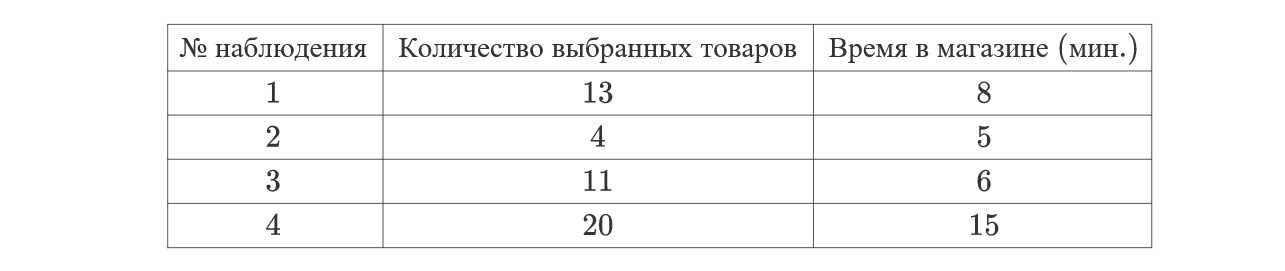

В качестве известной переменной , как уже отмечалось, выберем количество товаров, которое купил человек, а в качестве отклика – время, проведенное в магазине.

Вычислите среднее количество выбранных товаров, время в магазине, $\theta_0, \theta_1$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

t = np.array([8, 5, 6, 15])
N = np.array([13, 4, 11, 20])
n = len(t)
t_av = np.mean(t)
N_av = np.mean(N)
print(t_av, N_av)

Theta1_ = 0
Theta0_ = 0
numerator = 0
denominator = 0

for i in range(0, n):
    numerator += (N[i]-N_av)*(t[i]-t_av)
    denominator += (N[i]-N_av)**2
Theta1_ = numerator/denominator
Theta0_ = t_av - Theta1_*N_av
print('Theta = ', Theta1_, Theta0_)

8.5 12.0
Thata =  0.6307692307692307 0.930769230769231


# Задание 2

Перед вами результаты наблюдений длительности нахождения человека в очереди в зависимости от количества людей в этой очереди.

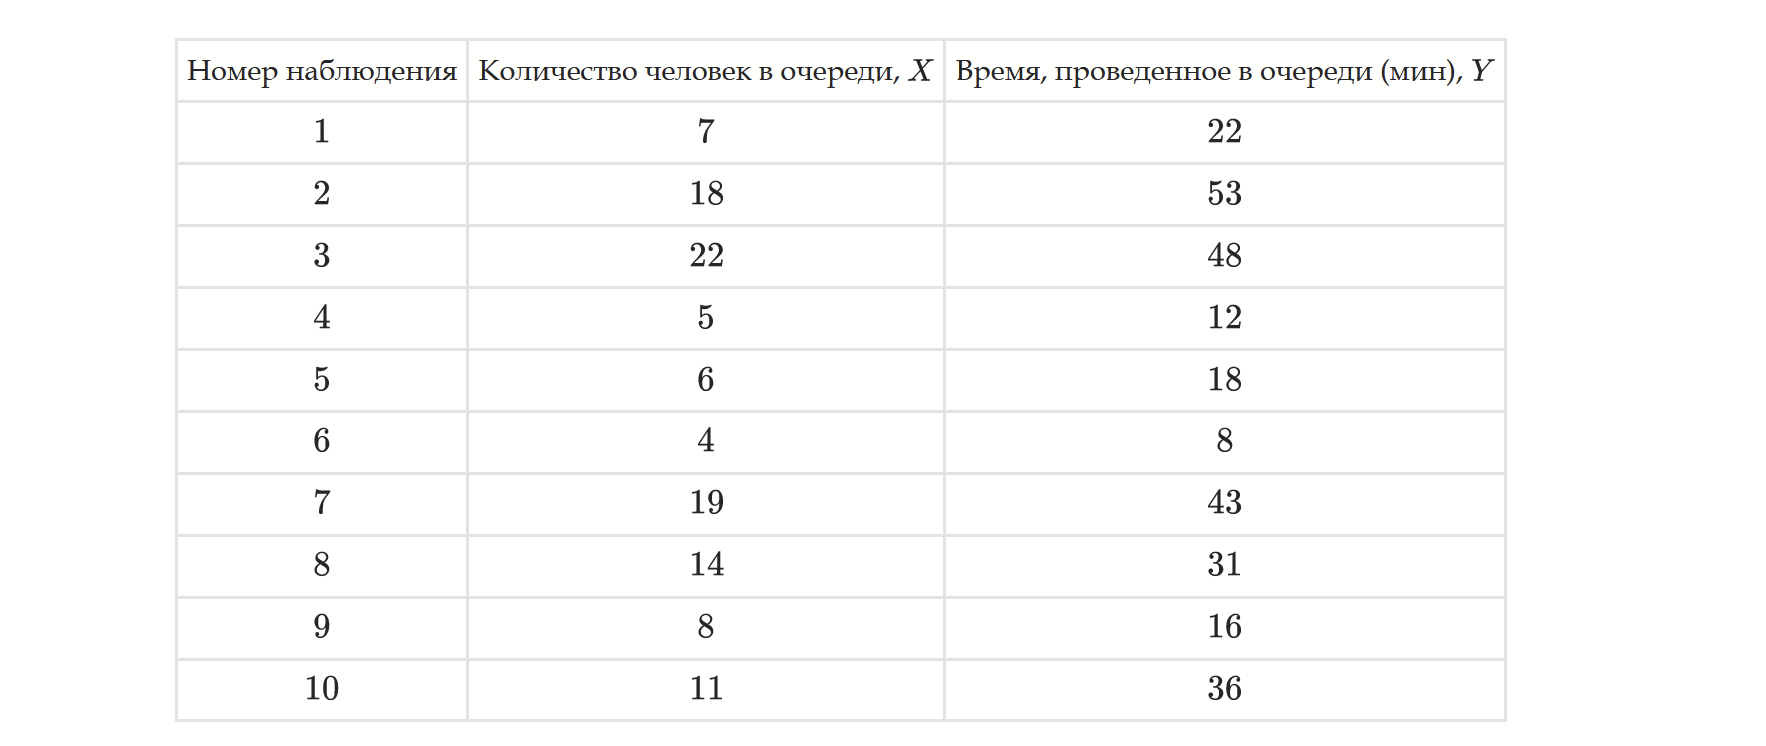

Ниже данные таблицы представлены в формате строк, на случай если таблица не копируется (можно сразу сохранить как CSV файл, используя любой текстовый редактор):

 id,X,Y

 1,7,22

 2,18,53

 3,22,48

 4,5,12

 5,6,18

 6,4,8

 7,19,43

 8,14,31

 9,8,16

 10,11,36

Обучите модель линейной регрессии для прогнозирования и вычислите указанные параметры:

Выборочное среднее $\overline X$, выборочное среднее $\overline Y$, коэффициенты $\theta_0$, $\theta_1$, точность модели, вычислив $R^2$ статистику.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

data = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_Linear_Regression/theme_3_data.csv', index_col=0)
X = np.array(data.X)
y = np.array(data.Y)
X_mean = np.mean(X)
y_mean = np.mean(y)
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
print('X среднее = ', X_mean)
print('Y среднее = ', y_mean)
print('Theta0 = ', reg.intercept_)
print('Theta1 = ', reg.coef_)
print('R^2 = ', reg.score(X, y))

X среднее =  11.4
Y среднее =  28.7
Theta0 =  [2.43517535]
Theta1 =  [[2.30393199]]
R^2 =  0.8863714206739393


# Задание 3

 В прилагаемом файле представлены данные, собранные путем голосования за самые лучшие (или, по крайней мере, самые популярные) конфеты Хэллоуина. Обучите модель линейной многомерной регрессии. В качестве предикторов выступают поля: chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewafer, hard, bar, pluribus, sugarpercent, pricepercent, отклик — winpercent.

В качестве тренировочного набора данных используйте данные из файла, за иключением следующих конфет: Caramel Apple Pops, Hersheys Kisses. Обучите модель.

Найдите следующие характеристики:
- Предсказанное значение winpercent для конфеты Caramel Apple Pops
- Предсказанное значение winpercent для конфеты Hersheys Kisses
- Предсказанное значение winpercent для конфеты с параметрами [1, 0, 0, 1, 1, 0, 0, 1, 1, 0.624, 0.438]

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_Linear_Regression/candy-data.csv', index_col=0)
print('Размерность считанных данных', data.shape)

Размерность считанных данных (70, 13)


In [4]:
data = data.drop(index= ['Caramel Apple Pops', 'Hersheys Kisses'])
print('Размерность после удаления двух строк', data.shape)

Размерность после удаления двух строк (68, 13)


In [8]:
X = np.array(data[['chocolate', 'fruity', 'caramel',
                  'peanutyalmondy', 'nougat',
                  'crispedricewafer', 'hard', 'bar',
                  'pluribus', 'sugarpercent',
                  'pricepercent']])

print('Размерность регрессора: ', X.shape)

y = np.array(data.winpercent)
print('Размерность отклика: ', y.shape)
reg = LinearRegression().fit(X, y)

Candy = pd.read_csv('https://raw.githubusercontent.com/mihneh/ITMO_ML_labs/main/lab_Linear_Regression/candy-data.csv', index_col=0)
Candy = Candy.drop(['winpercent', 'Y'], axis = 1)
Candy = np.array(Candy.loc[['Caramel Apple Pops',
                            'Hersheys Kisses']])
print('Размерность тестового набора: ', Candy.shape)
print('Предсказанное значение winpercent для конфет Caramel Apple Pops, Hersheys Kisses: ', reg.predict(Candy))
X1 = np.array([[1,0,0,1,1,0,0,1,1,0.624,0.438]])
print('Предсказанное значение winpercent для конфеты с параметрами [1, 0, 0, 1, 1, 0, 0, 1, 1, 0.624, 0.438]: ', reg.predict(X1))

Размерность регрессора:  (68, 11)
Размерность отклика:  (68,)
Размерность тестового набора:  (2, 11)
Предсказанное значение winpercent для конфет Caramel Apple Pops, Hersheys Kisses:  [53.68280247 58.8607841 ]
Предсказанное значение winpercent для конфеты с параметрами [1, 0, 0, 1, 1, 0, 0, 1, 1, 0.624, 0.438]:  [64.69721336]
